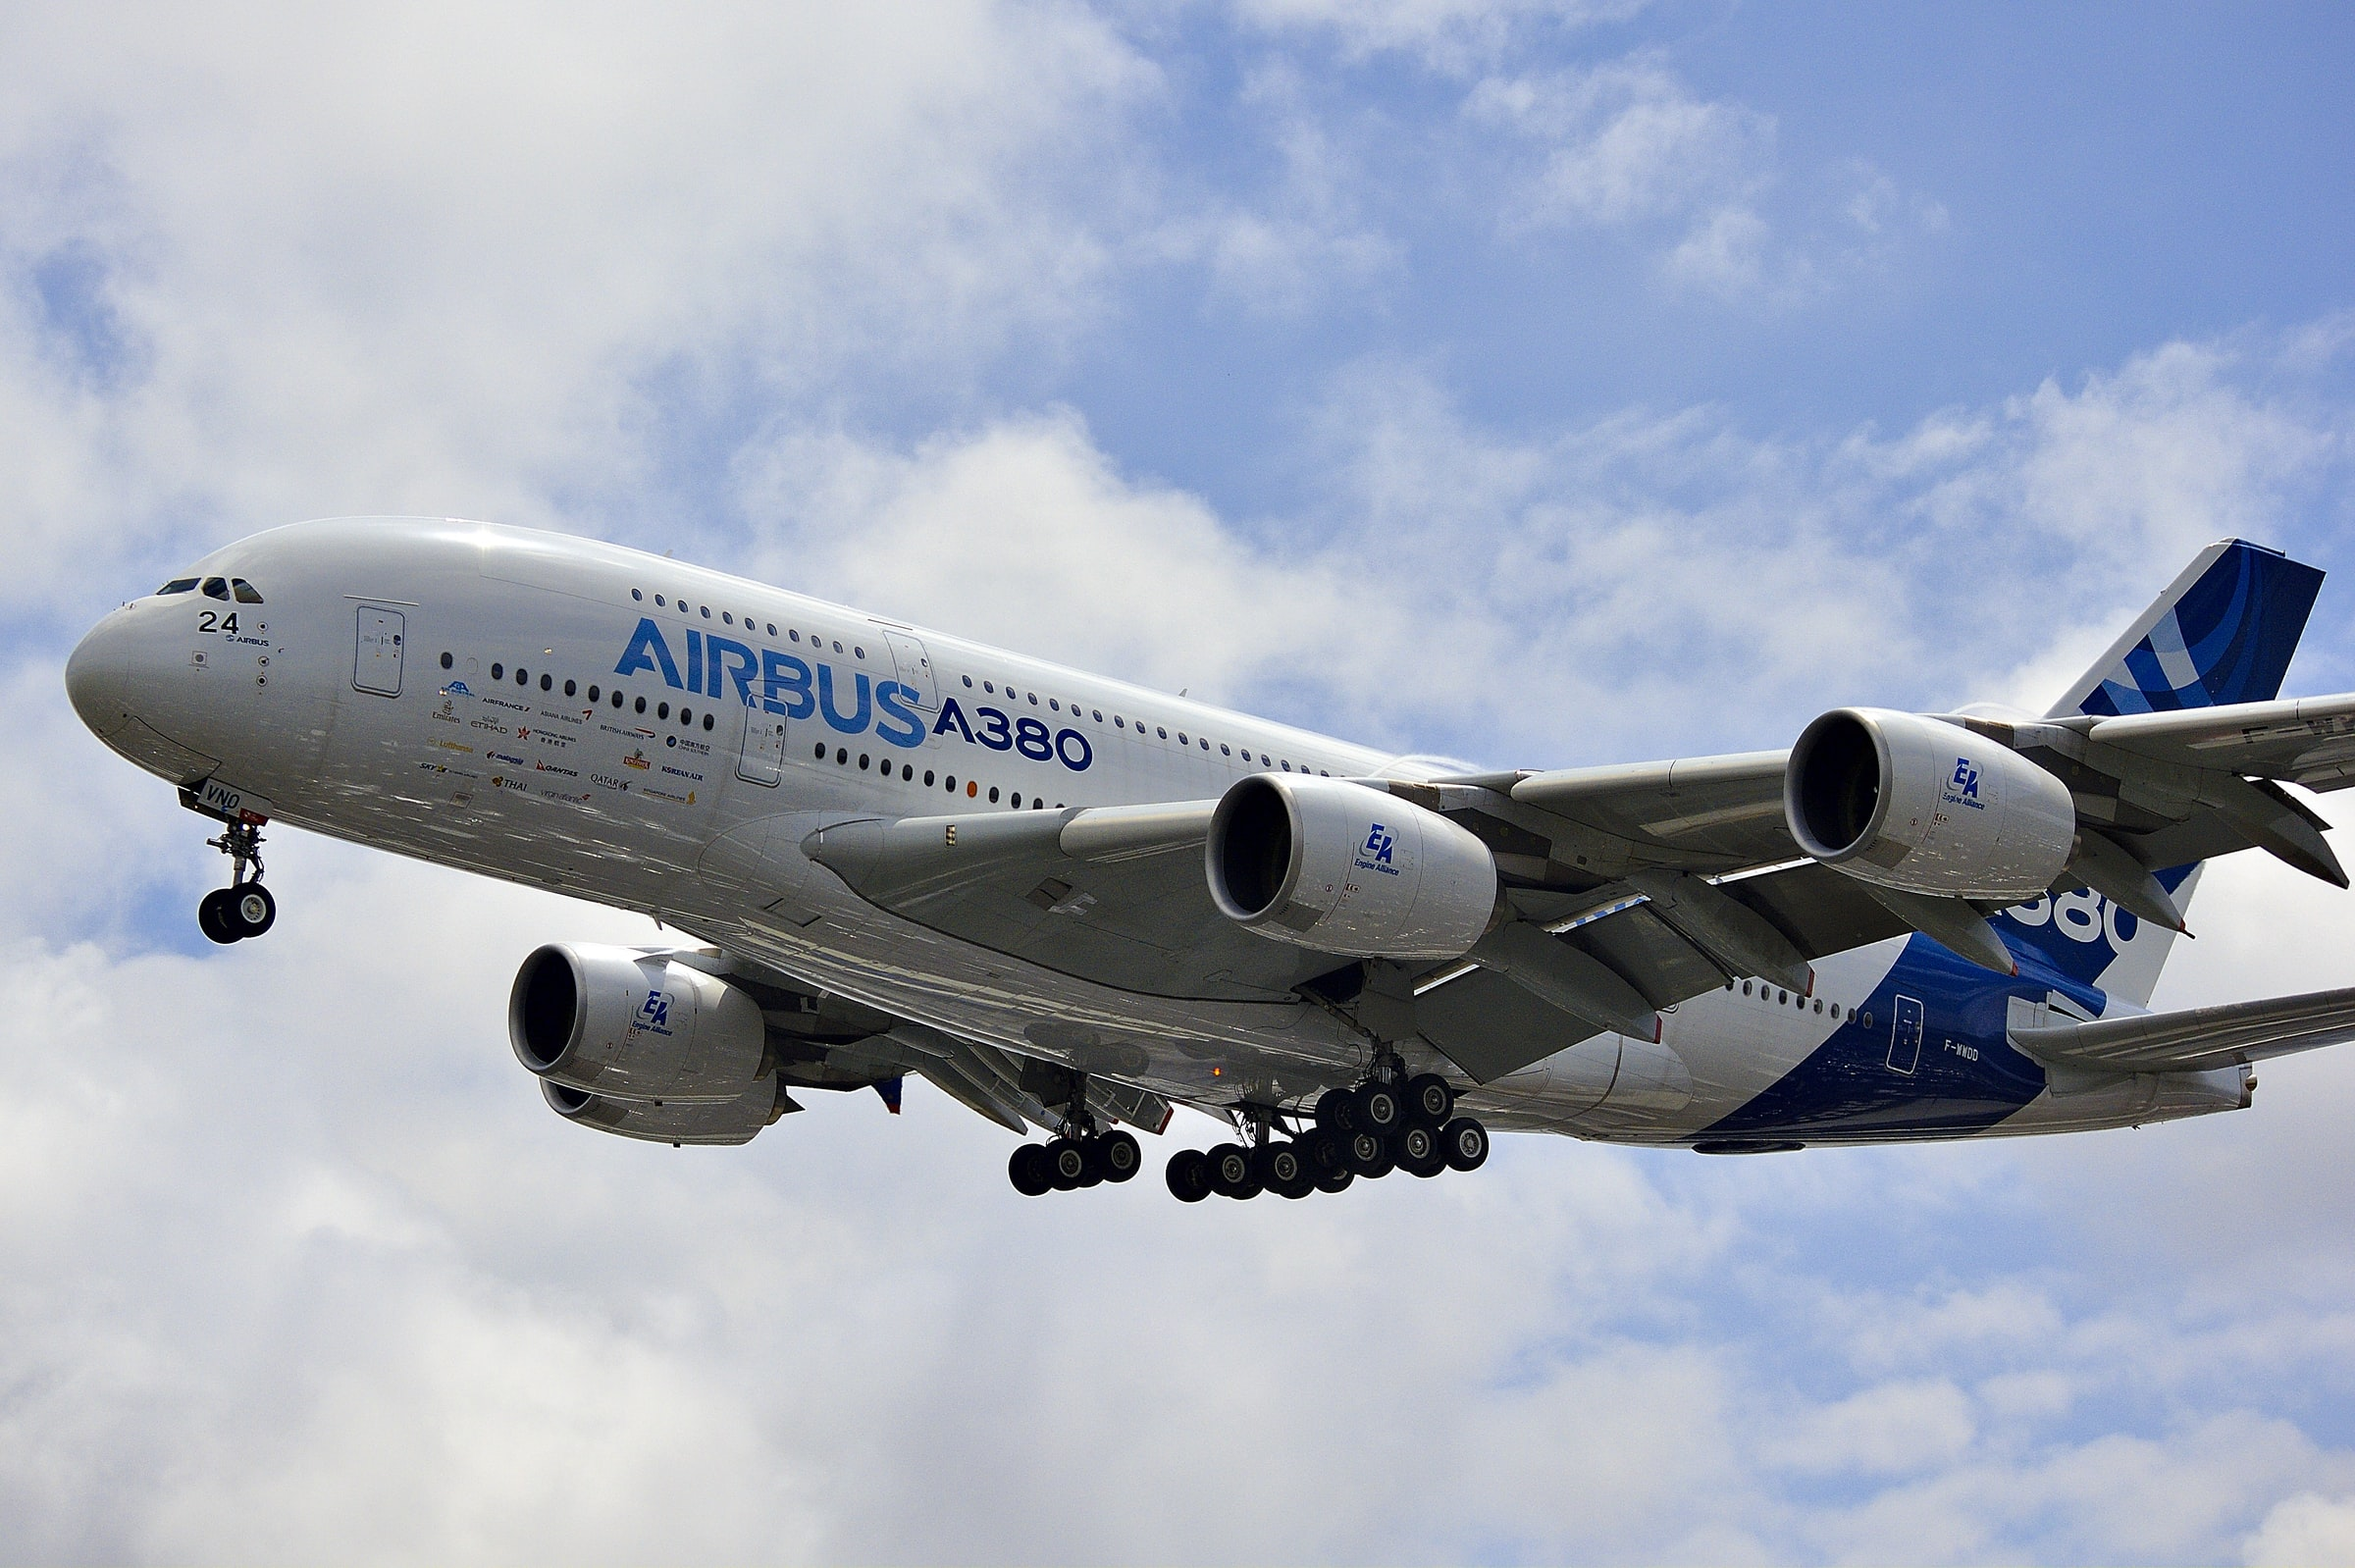

In [1]:
from IPython.display import Image
Image(filename ='E:/PIP_Devmallya/Week_3/Problem_2/Airplane.jpg', width = 800, height = 200)

# Sentiment Analysis

    Let us get you working on NLP - Sentiment analysis. 

    The attached data is a twitter feed about airlines. You are allowed to use any kind of packages available to determine the following columns. 
    Airline_Sentiment: Defines the sentiment of the tweet
    Airline_sentiment_confidence: Shows the confidence level of the previously shown definition of sentiment
    Negative_reason: If the sentiment is negative, why was it declared negative
    Negative_reason_confidence: Essentially the confidence on the negativity of the tweet. 

    You are free to choose the stop words if necessary, select the inbuilt packages if you feel it fits or create your own positive and negative setup. 

    Note: Your submission should include: 
    CSV with the four above mentioned columns
    Word cloud for each airline showcasing the most used negative words. 
    Choose any graph to showcase each airline's positive and negative sentiment in the overall dataset. Present it.

# 1. Import the Dependencies

In [59]:
import pandas as pd
import numpy as np
import re
import nltk
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.svm import SVC
from wordcloud import WordCloud
from termcolor import cprint
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score, roc_auc_score, plot_confusion_matrix
%matplotlib inline
sns.set(style='darkgrid')
warnings.filterwarnings('ignore')

# 2. Load the Dataset

In [3]:
df = pd.read_csv('E:/PIP_Devmallya/Week_3/Problem_2/tweets_2.csv')
df.head()

tweet_id airline_sentiment  airline_sentiment_confidence  \
0  5.703060e+17           Neutral                       0.00000   
1  5.703010e+17           Neutral                       0.00000   
2  5.703010e+17          Negative                      -0.31250   
3  5.703010e+17          Positive                       0.00625   
4  5.703010e+17          Negative                      -0.35000   

            negativereason  negativereason_confidence         airline  \
0                      NaN                     0.0000  Virgin America   
1                      NaN                     0.0000  Virgin America   
2  Flight Booking Problems                     0.0000  Virgin America   
3                      NaN                    -0.3306  Virgin America   
4  Flight Booking Problems                    -0.5829  Virgin America   

         name  retweet_count  \
0     cairdin              0   
1    jnardino              0   
2  yvonnalynn              0   
3    jnardino              0   
4    jnardino              0   

                                                text tweet_coord  \
0                @VirginAmerica What @dhepburn said.         NaN   
1  @VirginAmerica plus you've added commercials t...         NaN   
2  @VirginAmerica I didn't today... Must mean I n...         NaN   
3  @VirginAmerica it's really aggressive to blast...         NaN   
4  @VirginAmerica and it's a really big bad thing...         NaN   

               tweet_created tweet_location               user_timezone  
0  2015-02-24 11:35:52 -0800            NaN  Eastern Time (US & Canada)  
1  2015-02-24 11:15:59 -0800            NaN  Pacific Time (US & Canada)  
2  2015-02-24 11:15:48 -0800      Lets Play  Central Time (US & Canada)  
3  2015-02-24 11:15:36 -0800            NaN  Pacific Time (US & Canada)  
4  2015-02-24 11:14:45 -0800            NaN  Pacific Time (US & Canada)

In [4]:
df.shape

(14640, 13)

# 3. EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  float64
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                3152 non-null   object 
 4   negativereason_confidence     14640 non-null  float64
 5   airline                       14640 non-null  object 
 6   name                          14640 non-null  object 
 7   retweet_count                 14640 non-null  int64  
 8   text                          14640 non-null  object 
 9   tweet_coord                   1019 non-null   object 
 10  tweet_created                 14640 non-null  object 
 11  tweet_location                9907 non-null   object 
 12  user_timezone                 9820 non-null   object 
dtypes

In [6]:
df.describe()

tweet_id  airline_sentiment_confidence  negativereason_confidence  \
count  1.464000e+04                  14640.000000               14640.000000   
mean   5.692184e+17                      0.061981                   0.087108   
std    7.791092e+14                      0.314005                   0.432815   
min    5.675880e+17                     -1.000000                  -0.972900   
25%    5.685590e+17                      0.000000                  -0.226300   
50%    5.694780e+17                      0.000000                   0.000000   
75%    5.698902e+17                      0.200000                   0.440400   
max    5.703110e+17                      1.000000                   0.971600   

       retweet_count  
count   14640.000000  
mean        0.082650  
std         0.745778  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max        44.000000

## Check the missing values in our dataset

In [7]:
df.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                  11488
negativereason_confidence           0
airline                             0
name                                0
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

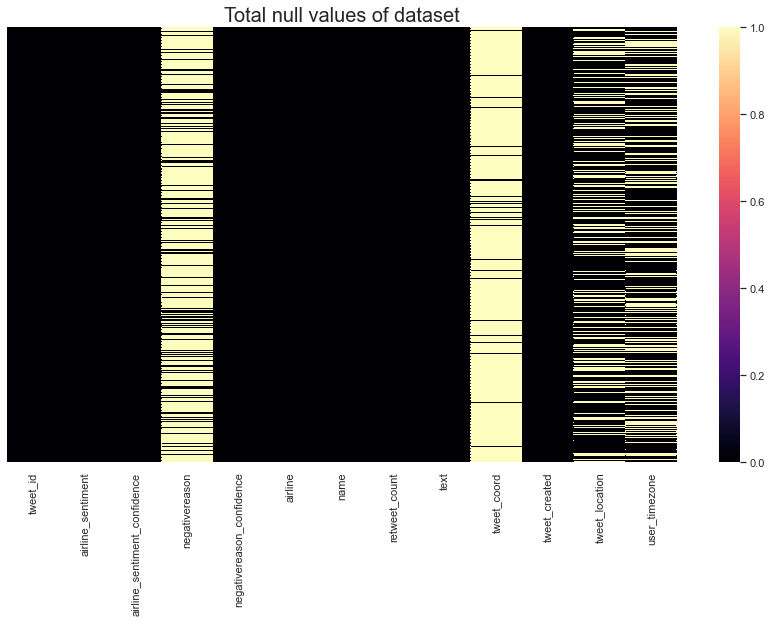

In [8]:
plt.figure(figsize=(15,8))
sns.heatmap(df.isnull(), yticklabels = False, cmap='magma')
plt.title('Total null values of dataset',size=20);

    From this we can see lots of missing values in the columns, but we will not use those columns because we will mainly focus on text column. So, missing data imputation is not required.

Total number of sentiments of tweets :
Neutral     5946
Positive    5542
Negative    3152
Name: airline_sentiment, dtype: int64


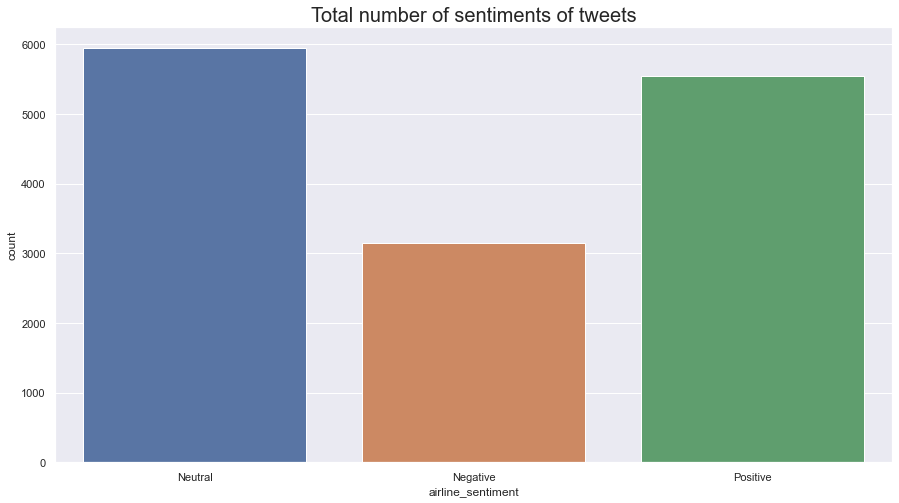

In [9]:
cprint("Total number of sentiments of tweets :",'green')
print(df.airline_sentiment.value_counts())
plt.figure(figsize = (15, 8))
ax = sns.countplot(x = 'airline_sentiment', data = df)
ax.set_title(label = 'Total number of sentiments of tweets', fontsize = 20)
plt.show()

    Total number of neutral sentiments of tweets are more compare to positive and negative.

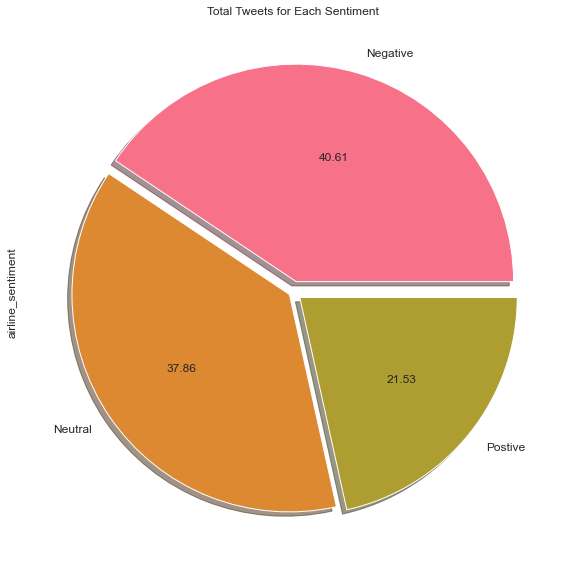

In [10]:
ax.set_title(label = 'Total number of sentiments of tweets:')
colors=sns.color_palette('husl',10)
pd.Series(df['airline_sentiment']).value_counts().plot(kind='pie',colors=colors,labels=['Negative','Neutral','Postive'],explode=[0.05,0.02,0.04],shadow=True,autopct='%.2f',fontsize=12,figsize=(10,10),title="Total Tweets for Each Sentiment")
plt.show()

    In here we showed the percentage of the each sentiment of total tweets.

Text(0, 0.5, 'No.of Tweets')

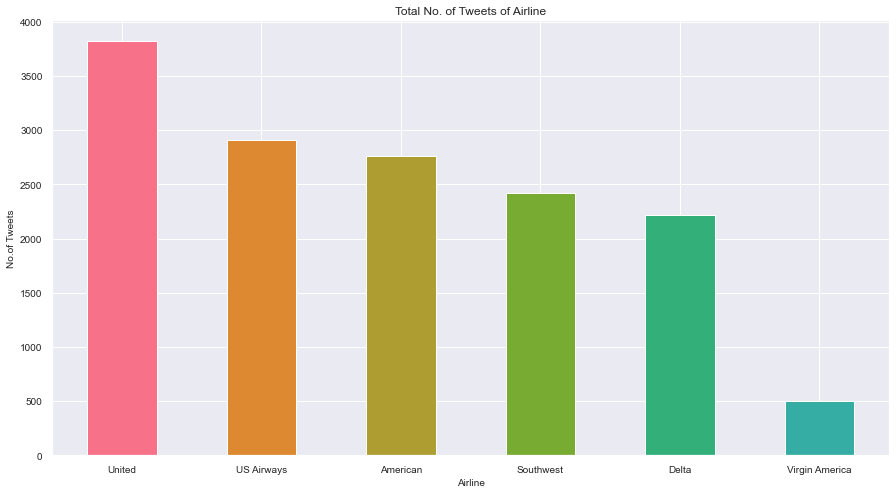

In [11]:
colors=sns.color_palette('husl',10)
pd.Series(df['airline']).value_counts().plot(kind="bar",color=colors,figsize=(15,8),fontsize=10,rot=0,title='Total No. of Tweets of Airline')
plt.xlabel('Airline',fontsize=10)
plt.ylabel('No.of Tweets',fontsize=10)

    The above graph is displaying the total no. of tweets done under each airlines name.

Total number of tweets for each airline :
airline
American          2759
Delta             2222
Southwest         2420
US Airways        2913
United            3822
Virgin America     504
Name: airline_sentiment, dtype: int64


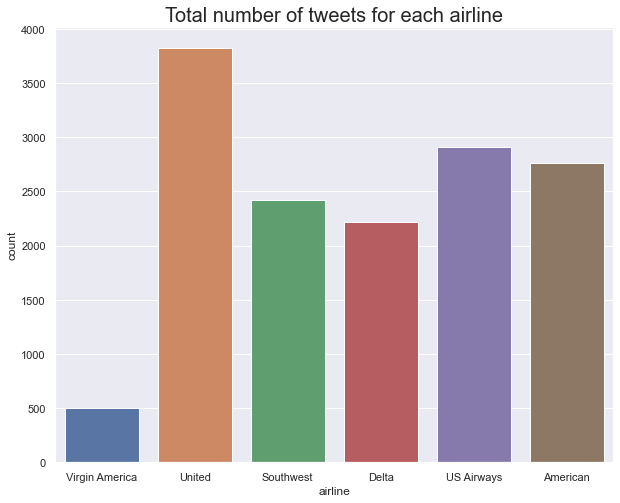

Total number of sentiment tweets for each airline :
US Airways : 
 Neutral     1168
Positive     934
Negative     811
Name: airline_sentiment, dtype: int64
United : 
 Neutral     1500
Positive    1382
Negative     940
Name: airline_sentiment, dtype: int64
American : 
 Neutral     1143
Positive    1004
Negative     612
Name: airline_sentiment, dtype: int64
Southwest : 
 Positive    1030
Neutral      981
Negative     409
Name: airline_sentiment, dtype: int64
Delta : 
 Positive    966
Neutral     941
Negative    315
Name: airline_sentiment, dtype: int64
Virgin America : 
 Positive    226
Neutral     213
Negative     65
Name: airline_sentiment, dtype: int64


In [12]:
cprint("Total number of tweets for each airline :",'green')
print(df.groupby('airline')['airline_sentiment'].count())

plt.figure(figsize = (10, 8))
ax = sns.countplot(x = 'airline', data = df)
ax.set_title(label = 'Total number of tweets for each airline', fontsize = 20)
plt.show()

cprint("Total number of sentiment tweets for each airline :",'green')
airlines= ['US Airways','United','American','Southwest','Delta','Virgin America']
for i in airlines :
    print('{} : \n'.format(i),df.loc[df.airline == i].airline_sentiment.value_counts())

    From this we can see that total number of sentiment tweets for US Airways are more compare to other airlines.

## Reasons of Negative tweets

Reasons Of Negative Tweets :
Cancelled Flight               522
longlines                      437
Can't Tell                     413
Late Flight                    337
Lost Luggage                   313
Bad Flight                     296
Customer Service Issue         223
Flight Booking Problems        221
Damaged Luggage                202
Flight Attendant Complaints    188
Name: negativereason, dtype: int64


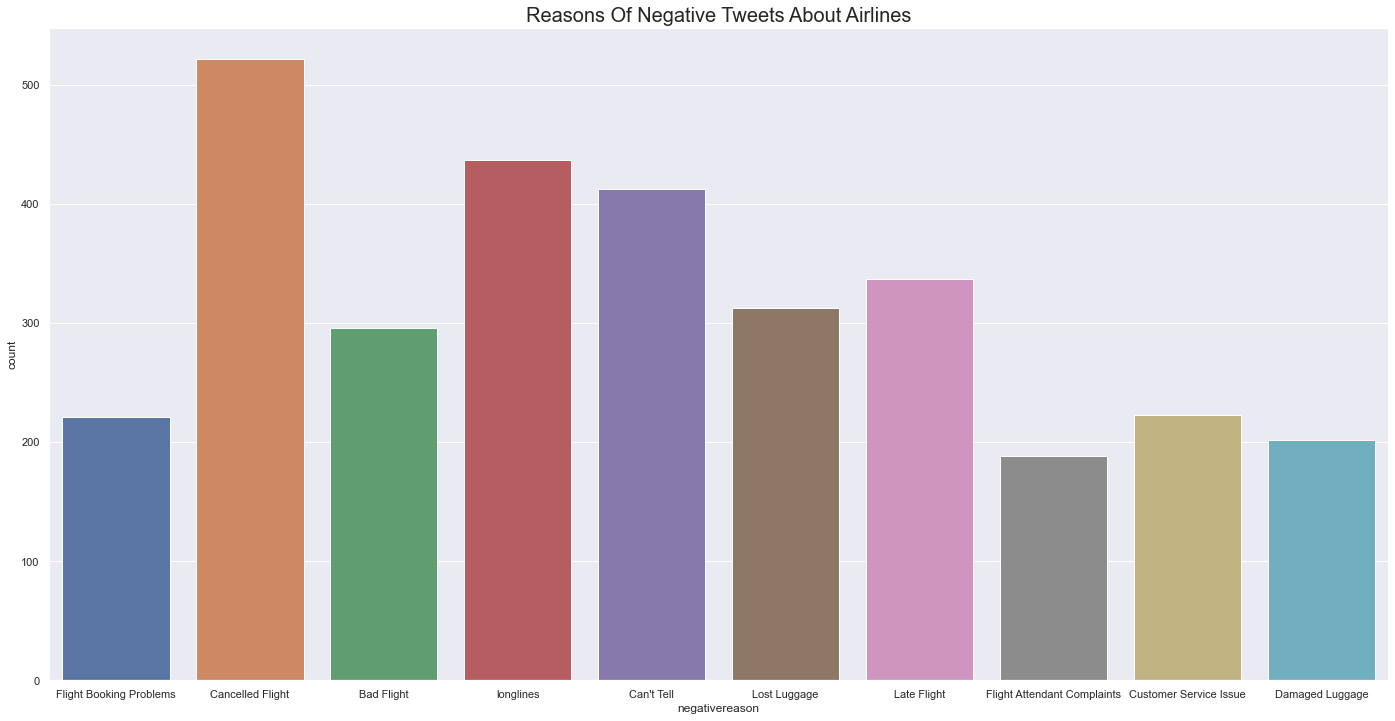

In [13]:
cprint('Reasons Of Negative Tweets :','green')
print(df.negativereason.value_counts())

plt.figure(figsize = (24, 12))
sns.countplot(x = 'negativereason', data = df)
plt.title('Reasons Of Negative Tweets About Airlines', fontsize = 20)
plt.show()

    From this above analysis we can see that Cancelled Flight is the main reasons of negative tweets.

## Every Airline Company's Reasons for Negative Tweets

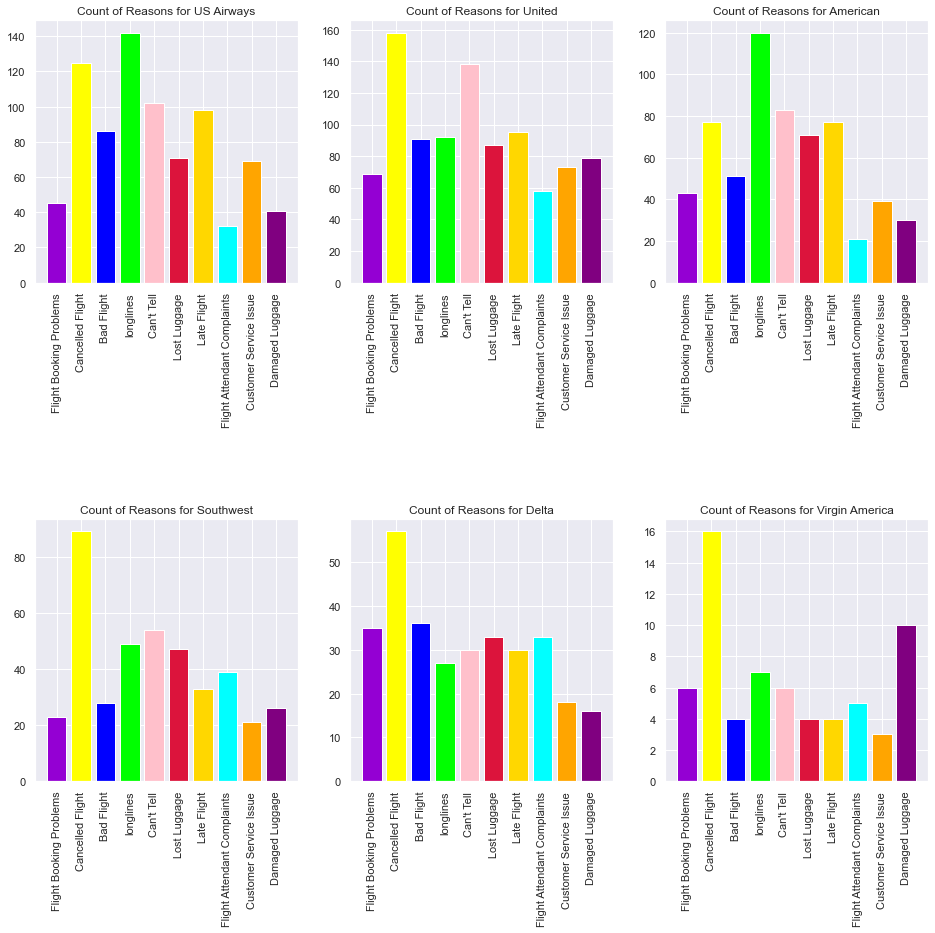

In [14]:
NR_Count=df['negativereason'].value_counts()
def NCount(Airline):
    airlineName =df[df['airline']==Airline]
    count= airlineName['negativereason'].value_counts()
    Unique_reason= df['negativereason'].unique()
    Unique_reason=[x for x in Unique_reason if str(x) != 'nan']
    Reason_frame=pd.DataFrame({'Reasons':Unique_reason})
    Reason_frame['count']=Reason_frame['Reasons'].apply(lambda x: count[x])
    return Reason_frame

def Plot_Reason(airline):
    a= NCount(airline)
    count=a['count']
    Id = range(1,(len(a)+1))
    plt.bar(Id,count, color=['darkviolet','yellow','blue','lime','pink','crimson','gold','cyan','orange','purple'])
    plt.xticks(Id,a['Reasons'],rotation=90)
    plt.title('Count of Reasons for '+ airline)
    
plt.figure(2,figsize=(16, 14))
for i in airlines:
    indices= airlines.index(i)
    plt.subplot(2,3,indices+1)
    plt.subplots_adjust(hspace=0.9)
    Plot_Reason(i)

    Customer Service Issue and Cancelled Flight is the main neagtive reason for US Airways,United,American,Southwest and Delta.
    Late Flight is the main negative reason for Delta.
    Interestingly, Virgin America has the least count of negative reasons (all less than 60).
    Contrastingly to Virgin America, airlines like US Airways,United,American have more than 500 negative reasons (Late flight, Customer Service Issue).

## Split Text Of Sentiments

In [15]:
positive=df[df['airline_sentiment']=='Positive'].text
neutral=df[df['airline_sentiment']=='Neutral'].text
negative=df[df['airline_sentiment']=='Negative'].text

    Although wordclouds may provide little insight into the data, they are excellent at attracting the attention of non-technical audiences.

## World Cloud of Postive Sentiments

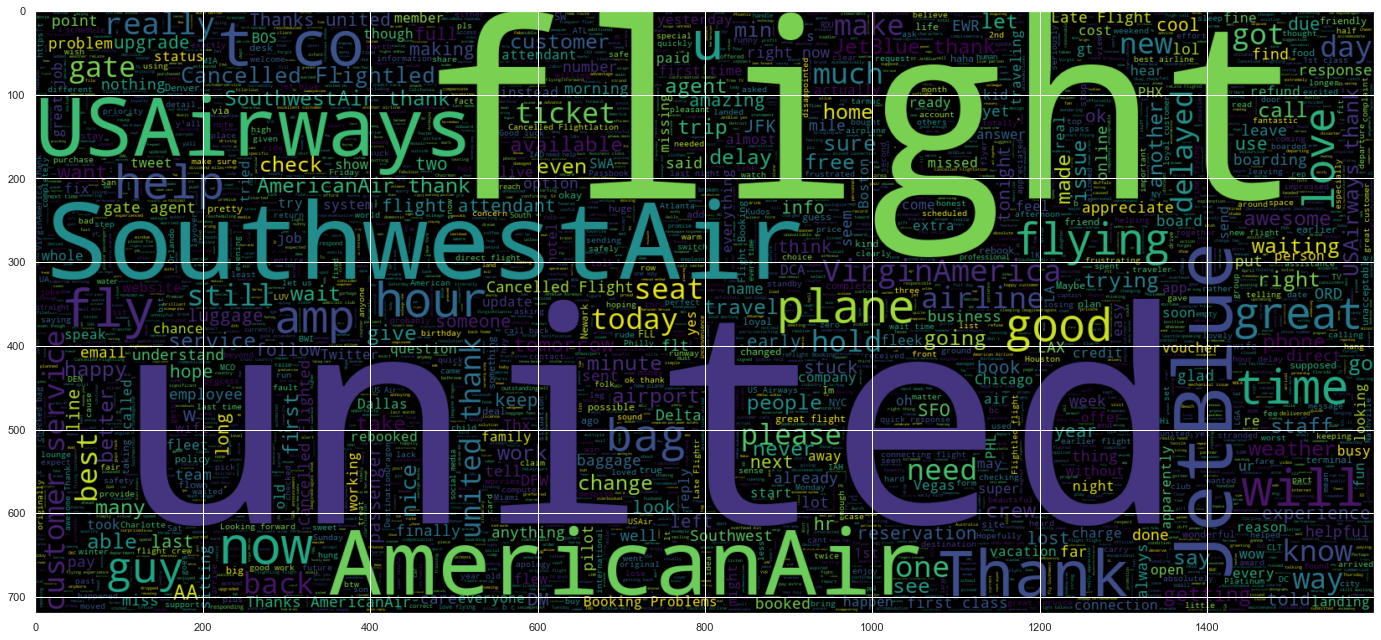

In [16]:
plt.figure(figsize=(24,20))
world_cloud_postive=WordCloud(min_font_size=3,max_words=3200,width=1600,height=720).generate("".join(positive))
plt.imshow(world_cloud_postive,interpolation='bilinear')
ax.grid(False)

## Word Cloud of Neutral Sentiments

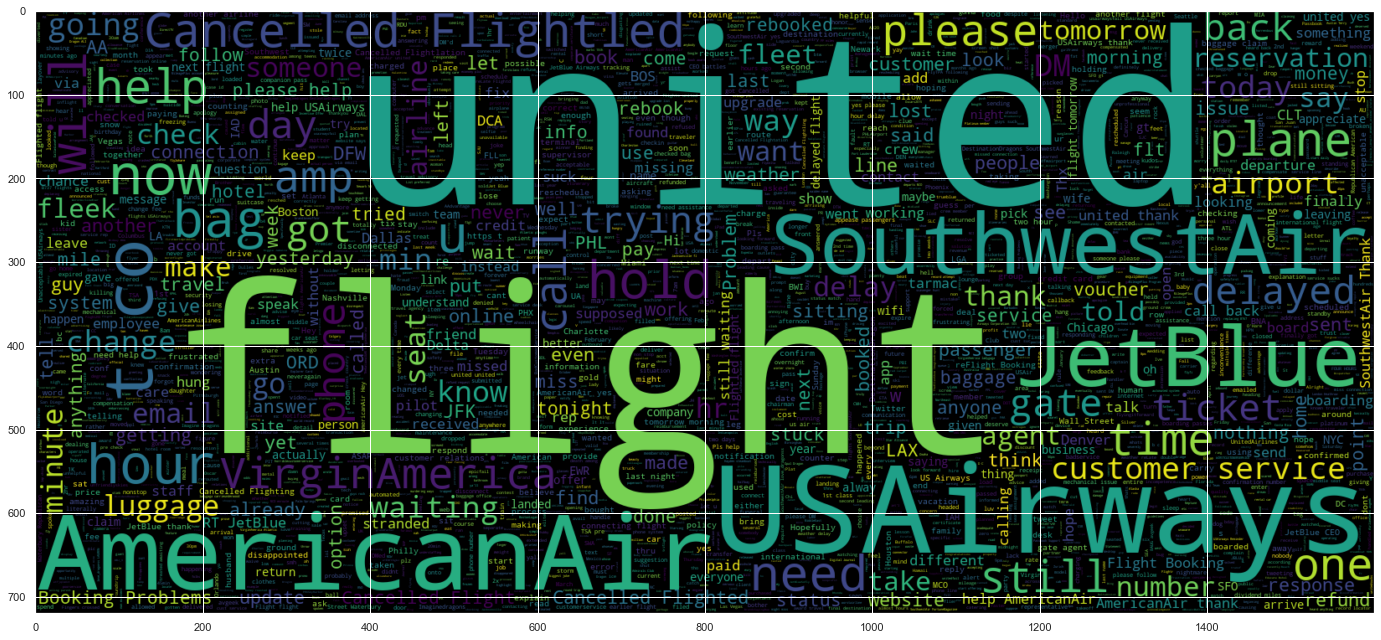

In [17]:
plt.figure(figsize=(24,12))
world_cloud_neutral=WordCloud(min_font_size=3,max_words=3200,width=1600,height=720).generate(" ".join(neutral))
plt.imshow(world_cloud_neutral,interpolation='bilinear')
ax.grid(False)

## Word Cloud of Negative Sentiments

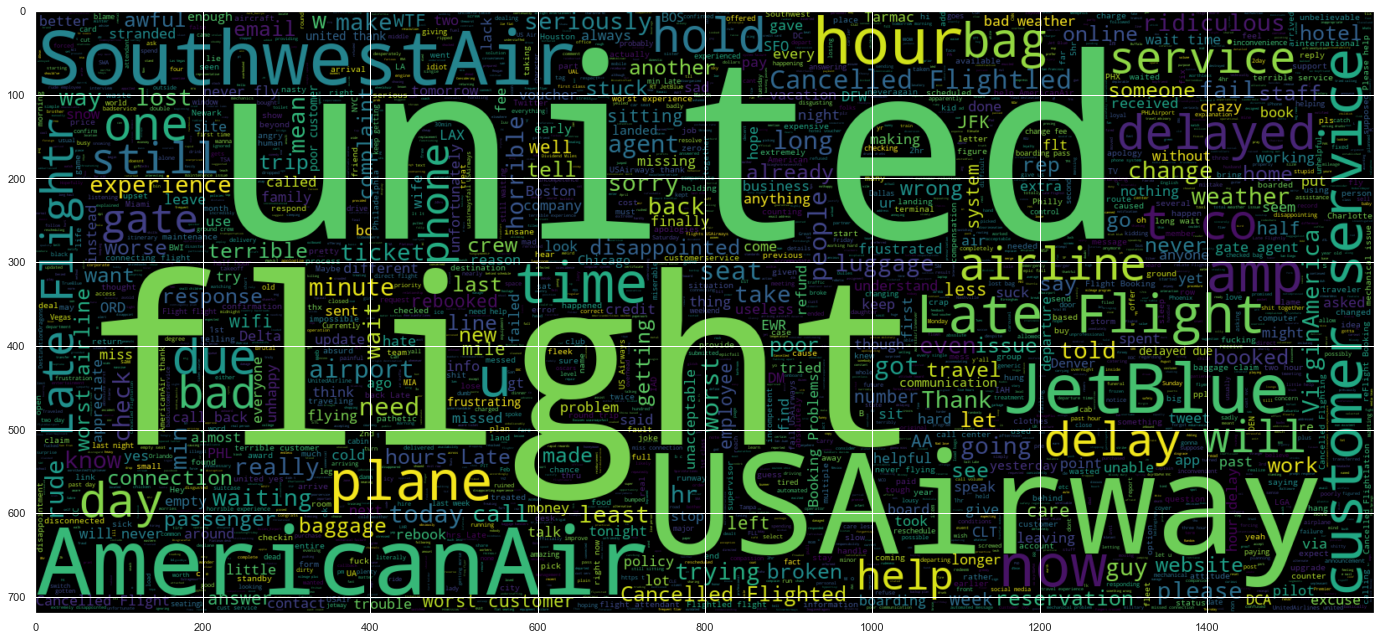

In [18]:
plt.figure(figsize = (24,12)) 
worldcould_neg = WordCloud(min_font_size = 3,  max_words = 3200 , width = 1600 , height = 720).generate(" ".join(negative))
plt.imshow(worldcould_neg,interpolation = 'bilinear')
ax.grid(False)

    The word cloud is beneficial because it begins to scale the importance of some phrases over others. The word cloud may also be used to demonstrate how an algorithm might be beneficial. On both the negative and positive representations, there are frequent terms, demonstrating how the same phrases may imply various things in different circumstances and how algorithms can consume information from a whole phrase.
    But let's assume I don't simply want to know if a tweet was received positively or negatively; I want to understand what it all means. I can't obtain a summary of all the concepts in larger words, as you'd get from meeting minutes using word clouds. I lose track of the context of the complete sentence in which these sentences appeared, and I'm left with just my own interpretation and outside information to work with.

# 4. Data Preprocessing

    In this phase, we will clean the text data by removing special characters, digits from the text, stop words, url, username, and emojis.

In [19]:
# convert Sentiments to 0,1,2
def convert_Sentiment(sentiment):
    if  sentiment == "Positive":
        return 2
    elif sentiment == "Neutral":
        return 1
    elif sentiment == "Negative":
        return 0

In [20]:
# Apply convert_Sentiment function
df['airline_sentiment'] = df['airline_sentiment'].apply(lambda x : convert_Sentiment(x))

In [21]:
df.head()

tweet_id  airline_sentiment  airline_sentiment_confidence  \
0  5.703060e+17                  1                       0.00000   
1  5.703010e+17                  1                       0.00000   
2  5.703010e+17                  0                      -0.31250   
3  5.703010e+17                  2                       0.00625   
4  5.703010e+17                  0                      -0.35000   

            negativereason  negativereason_confidence         airline  \
0                      NaN                     0.0000  Virgin America   
1                      NaN                     0.0000  Virgin America   
2  Flight Booking Problems                     0.0000  Virgin America   
3                      NaN                    -0.3306  Virgin America   
4  Flight Booking Problems                    -0.5829  Virgin America   

         name  retweet_count  \
0     cairdin              0   
1    jnardino              0   
2  yvonnalynn              0   
3    jnardino              0   
4    jnardino              0   

                                                text tweet_coord  \
0                @VirginAmerica What @dhepburn said.         NaN   
1  @VirginAmerica plus you've added commercials t...         NaN   
2  @VirginAmerica I didn't today... Must mean I n...         NaN   
3  @VirginAmerica it's really aggressive to blast...         NaN   
4  @VirginAmerica and it's a really big bad thing...         NaN   

               tweet_created tweet_location               user_timezone  
0  2015-02-24 11:35:52 -0800            NaN  Eastern Time (US & Canada)  
1  2015-02-24 11:15:59 -0800            NaN  Pacific Time (US & Canada)  
2  2015-02-24 11:15:48 -0800      Lets Play  Central Time (US & Canada)  
3  2015-02-24 11:15:36 -0800            NaN  Pacific Time (US & Canada)  
4  2015-02-24 11:14:45 -0800            NaN  Pacific Time (US & Canada)

In [22]:
df_airline_sentiment = df.groupby(['airline', 'airline_sentiment'])['tweet_id'].count().to_frame().rename(columns={'tweet_id' : 'count'}).reset_index()
df_airline_sentiment

airline  airline_sentiment  count
0         American                  0    612
1         American                  1   1143
2         American                  2   1004
3            Delta                  0    315
4            Delta                  1    941
5            Delta                  2    966
6        Southwest                  0    409
7        Southwest                  1    981
8        Southwest                  2   1030
9       US Airways                  0    811
10      US Airways                  1   1168
11      US Airways                  2    934
12          United                  0    940
13          United                  1   1500
14          United                  2   1382
15  Virgin America                  0     65
16  Virgin America                  1    213
17  Virgin America                  2    226

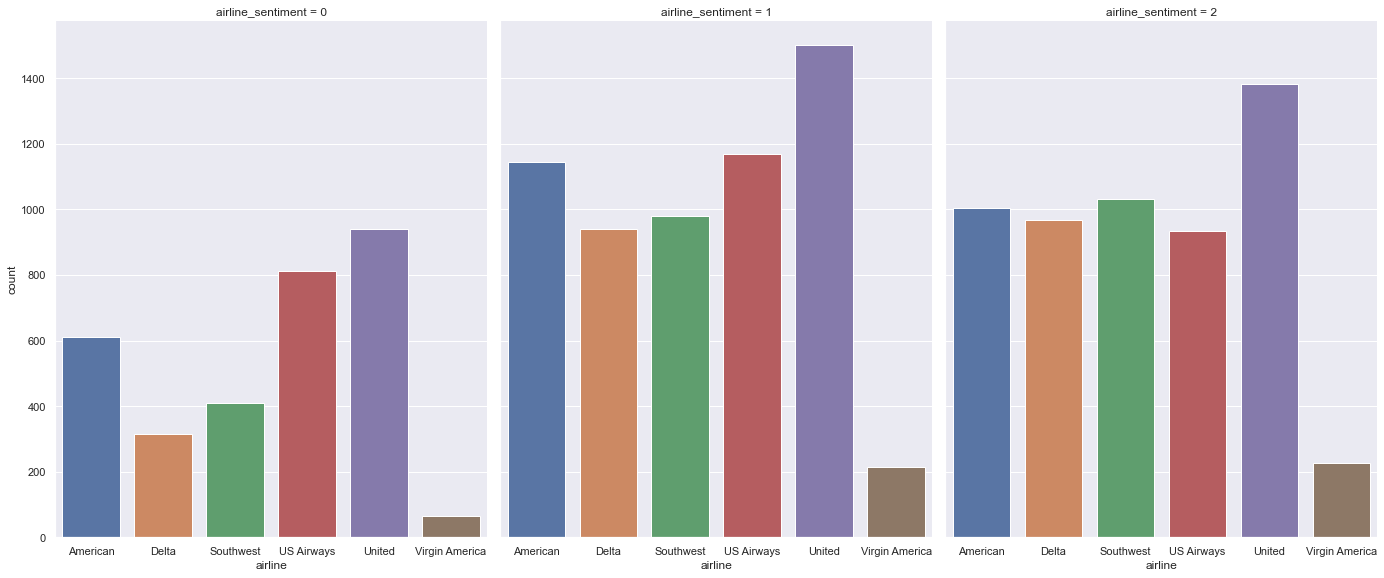

In [23]:
df_train_GR_plot = sns.catplot(x = "airline", y = "count", col = "airline_sentiment", data = df_airline_sentiment, kind = "bar", height = 8, aspect = .8);

    Above graph is to showcase each airline's positive and negative sentiment including neutral in the overall dataset.

In [24]:
# Remove stop words
def remove_stopwords(text):
    text = ' '.join([word for word in text.split() if word not in (stopwords.words('english'))])
    return text

In [25]:
# Remove url  
def remove_url(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

In [26]:
# Remove punct
def remove_punct(text):
    table = str.maketrans('', '', string.punctuation)
    return text.translate(table)

In [27]:
# Remove html 
def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)

In [28]:
# Remove @username
def remove_username(text):
    return re.sub('@[^\s]+','',text)

In [29]:
# Remove emojis
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [30]:
# Decontraction text
def decontraction(text):
    text = re.sub(r"won\'t", " will not", text)
    text = re.sub(r"won\'t've", " will not have", text)
    text = re.sub(r"can\'t", " can not", text)
    text = re.sub(r"don\'t", " do not", text)
    text = re.sub(r"can\'t've", " can not have", text)
    text = re.sub(r"ma\'am", " madam", text)
    text = re.sub(r"let\'s", " let us", text)
    text = re.sub(r"ain\'t", " am not", text)
    text = re.sub(r"shan\'t", " shall not", text)
    text = re.sub(r"sha\n't", " shall not", text)
    text = re.sub(r"o\'clock", " of the clock", text)
    text = re.sub(r"y\'all", " you all", text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"n\'t've", " not have", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'d've", " would have", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'ll've", " will have", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    text = re.sub(r"\'re", " are", text)
    return text

In [31]:
# Seperate alphanumeric
def seperate_alphanumeric(text):
    words = text
    words = re.findall(r"[^\W\d_]+|\d+", words)
    return " ".join(words)

In [32]:
def cont_rep_char(text):
    tchr = text.group(0) 
    
    if len(tchr) > 1:
        return tchr[0:2]

In [33]:
def unique_char(rep, text):
    substitute = re.sub(r'(\w)\1+', rep, text)
    return substitute

In [34]:
def char(text):
    substitute = re.sub(r'[^a-zA-Z]',' ',text)
    return substitute

In [35]:
# combaine negative reason with tweet (if exsist)
df['final_text'] = df['negativereason'].fillna('') + ' ' + df['text']

In [36]:
# Apply functions on tweets
df['final_text'] = df['final_text'].apply(lambda x : remove_username(x))
df['final_text'] = df['final_text'].apply(lambda x : remove_url(x))
df['final_text'] = df['final_text'].apply(lambda x : remove_emoji(x))
df['final_text'] = df['final_text'].apply(lambda x : decontraction(x))
df['final_text'] = df['final_text'].apply(lambda x : seperate_alphanumeric(x))
df['final_text'] = df['final_text'].apply(lambda x : unique_char(cont_rep_char,x))
df['final_text'] = df['final_text'].apply(lambda x : char(x))
df['final_text'] = df['final_text'].apply(lambda x : x.lower())
df['final_text'] = df['final_text'].apply(lambda x : remove_stopwords(x))

In [37]:
df['final_text']

0                                                     said
1                  plus added commercials experience tacky
2        flight booking problems today must mean need t...
3        really aggressive blast obnoxious entertainmen...
4             flight booking problems really big bad thing
                               ...                        
14635                   thank got different flight chicago
14636    cancelled flight leaving minutes late flight w...
14637            please bring american airlines blackberry
14638    money change flight answer phones suggestions ...
14639    ppl need know many seats next flight plz put u...
Name: final_text, Length: 14640, dtype: object

## Splitting the dataset into X and y

In [38]:
X = df['final_text']
y = df['airline_sentiment']

In [39]:
y

0        1
1        1
2        0
3        2
4        0
        ..
14635    1
14636    0
14637    1
14638    1
14639    2
Name: airline_sentiment, Length: 14640, dtype: int64

## TFIDF on cleaned tweets

    TFIDF stands for Term Frequency-Inverse Document Frequency and is another approach to transform textual data to quantitative form. The product of these two components, TF and IDF, produces the vector value.
    
    Term Frequency: Number of times word occurs in a text. It provides a value to a term based on its relevance in a text scaled by its importance across all documents in your corpus, mathematically removing normally occurring English terms and selecting words that are more important.

In [40]:
tfid = TfidfVectorizer()
X_final =  tfid.fit_transform(X)

In [41]:
X_final

<14640x10989 sparse matrix of type '<class 'numpy.float64'>'
	with 128151 stored elements in Compressed Sparse Row format>

## Handling Imbalanced Data

In [42]:
# Handling imbalanced using SMOTE
smote = SMOTE()
x_sm,y_sm = smote.fit_resample(X_final,y)

In [43]:
x_sm

<17838x10989 sparse matrix of type '<class 'numpy.float64'>'
	with 179112 stored elements in Compressed Sparse Row format>

In [44]:
y_sm

0        1
1        1
2        0
3        2
4        0
        ..
17833    2
17834    2
17835    2
17836    2
17837    2
Name: airline_sentiment, Length: 17838, dtype: int64

# 5. Split the Dataset into train and test

In [45]:
X_train , X_test , y_train , y_test = train_test_split(x_sm , y_sm , test_size=0.25, random_state=3)

In [46]:
(X_train.shape, X_test.shape) 

((13378, 10989), (4460, 10989))

In [47]:
(y_train.shape, y_test.shape)

((13378,), (4460,))

# 6. Model Building

## Random Forest

In [48]:
random_forest_classifier = RandomForestClassifier()
random_forest_classifier.fit(X_train,y_train)

RandomForestClassifier()

In [49]:
random_forest_classifier_prediction =  random_forest_classifier.predict(X_test)

In [50]:
random_forest_classifier_prediction

array([0, 0, 0, ..., 2, 0, 1], dtype=int64)

In [51]:
print('Accuracy of Random Forest:', accuracy_score(random_forest_classifier_prediction, y_test))

Accuracy of Random Forest: 0.9403587443946189


In [54]:
print(confusion_matrix(y_test, random_forest_classifier_prediction))

[[1440    6    3]
 [  33 1464   19]
 [  33  172 1290]]


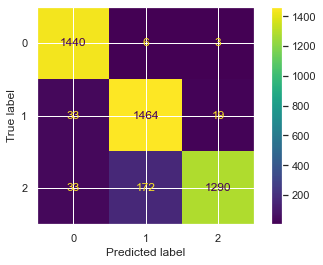

In [55]:
plot_confusion_matrix(random_forest_classifier, X_test, y_test)

In [56]:
print(classification_report(random_forest_classifier_prediction, y_test))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97      1506
           1       0.97      0.89      0.93      1642
           2       0.86      0.98      0.92      1312

    accuracy                           0.94      4460
   macro avg       0.94      0.94      0.94      4460
weighted avg       0.94      0.94      0.94      4460



## Random Forest Using Cross Validation RandomSearchCV

In [57]:
# Initialize the parameters for param_distributions for Randomized Search CV
parameters = {'criterion': ['entropy', 'gini'],
               'max_depth': [2,3,4,5,6,7,10],
               'min_samples_leaf': [4, 6, 8],
               'min_samples_split': [5, 7,10],
               'n_estimators': [300]}

In [60]:
model_RFC = RandomForestClassifier()
RF_model = RandomizedSearchCV(estimator = model_RFC, param_distributions = parameters, n_iter = 10, cv = 4, verbose= 1, random_state= 101, n_jobs = -1)
RF_model.fit(X_train, y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


RandomizedSearchCV(cv=4, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 10],
                                        'min_samples_leaf': [4, 6, 8],
                                        'min_samples_split': [5, 7, 10],
                                        'n_estimators': [300]},
                   random_state=101, verbose=1)

In [61]:
pred_RF = RF_model.predict(X_test)
pred_RF

array([0, 0, 1, ..., 2, 1, 1], dtype=int64)

In [62]:
print('Accuracy of Random Forest using cross validation:', accuracy_score(pred_RF, y_test))

Accuracy of Random Forest using cross validation: 0.87847533632287


In [63]:
print(confusion_matrix(y_test, pred_RF))

[[1413   25   11]
 [  95 1405   16]
 [  77  318 1100]]


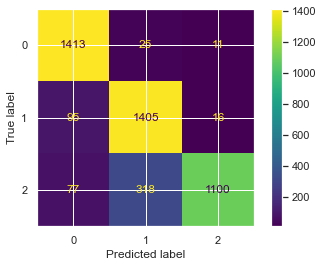

In [64]:
plot_confusion_matrix(RF_model, X_test, y_test)

In [65]:
print(classification_report(pred_RF, y_test))

              precision    recall  f1-score   support

           0       0.98      0.89      0.93      1585
           1       0.93      0.80      0.86      1748
           2       0.74      0.98      0.84      1127

    accuracy                           0.88      4460
   macro avg       0.88      0.89      0.88      4460
weighted avg       0.90      0.88      0.88      4460



## XGB Classifier

In [66]:
xgb = XGBClassifier()
xgb.fit(X_train,y_train)

[10:23:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [67]:
xgb_prediction = xgb.predict(X_test)
xgb_prediction

array([0, 0, 0, ..., 2, 0, 1], dtype=int64)

In [68]:
print('Accuracy of XGB Classifier:', accuracy_score(xgb_prediction, y_test))

Accuracy of XGB Classifier: 0.9403587443946189


In [69]:
print(confusion_matrix(y_test, xgb_prediction))

[[1438    5    6]
 [  30 1463   23]
 [  28  174 1293]]


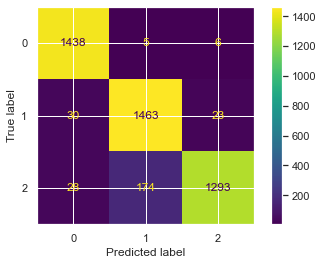

In [70]:
plot_confusion_matrix(xgb, X_test, y_test)

In [71]:
print(classification_report(xgb_prediction, y_test))

              precision    recall  f1-score   support

           0       0.99      0.96      0.98      1496
           1       0.97      0.89      0.93      1642
           2       0.86      0.98      0.92      1322

    accuracy                           0.94      4460
   macro avg       0.94      0.94      0.94      4460
weighted avg       0.94      0.94      0.94      4460



## Gradient Boosting Classifier

In [72]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [73]:
gbc_prediction = gbc.predict(X_test)
gbc_prediction

array([0, 0, 0, ..., 2, 0, 1], dtype=int64)

In [74]:
print('Accuracy of Gradient Boosting Classifier:', accuracy_score(gbc_prediction,y_test))

Accuracy of Gradient Boosting Classifier: 0.8878923766816144


In [75]:
print(confusion_matrix(y_test, gbc_prediction))

[[1418   21   10]
 [  35 1471   10]
 [  40  384 1071]]


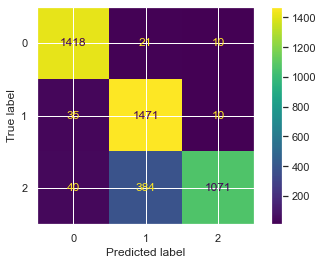

In [76]:
plot_confusion_matrix(gbc, X_test, y_test)

In [77]:
print(classification_report(gbc_prediction, y_test))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96      1493
           1       0.97      0.78      0.87      1876
           2       0.72      0.98      0.83      1091

    accuracy                           0.89      4460
   macro avg       0.89      0.91      0.89      4460
weighted avg       0.91      0.89      0.89      4460



## Support Vector Machine

In [78]:
svm = SVC()
svm.fit(X_train,y_train)

SVC()

In [79]:
svm_prediction = svm.predict(X_test)
svm_prediction

array([0, 0, 1, ..., 2, 0, 1], dtype=int64)

In [80]:
print('Accuracy of Support Vector Machine:', accuracy_score(svm_prediction,y_test))

Accuracy of Support Vector Machine: 0.9311659192825112


In [81]:
print(confusion_matrix(y_test, svm_prediction))

[[1429   17    3]
 [  27 1463   26]
 [  22  212 1261]]


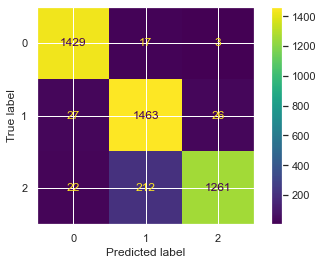

In [82]:
plot_confusion_matrix(svm, X_test, y_test)

In [83]:
print(classification_report(svm_prediction, y_test))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1478
           1       0.97      0.86      0.91      1692
           2       0.84      0.98      0.91      1290

    accuracy                           0.93      4460
   macro avg       0.93      0.94      0.93      4460
weighted avg       0.94      0.93      0.93      4460



## Naive Bayes

In [84]:
nb = MultinomialNB()
nb.fit(X_train,y_train)

MultinomialNB()

In [85]:
nb_prediction = nb.predict(X_test)
nb_prediction

array([0, 0, 1, ..., 2, 0, 1], dtype=int64)

In [86]:
print('Accuracy of Naive Bayes:', accuracy_score(nb_prediction,y_test))

Accuracy of Naive Bayes: 0.8298206278026906


In [87]:
print(confusion_matrix(y_test, nb_prediction))

[[1426   12   11]
 [ 246 1060  210]
 [ 159  121 1215]]


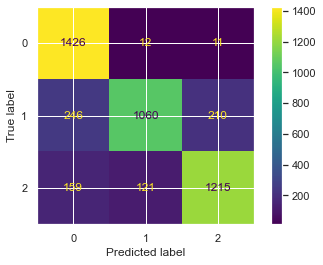

In [88]:
plot_confusion_matrix(nb, X_test, y_test)

In [89]:
print(classification_report(nb_prediction, y_test))

              precision    recall  f1-score   support

           0       0.98      0.78      0.87      1831
           1       0.70      0.89      0.78      1193
           2       0.81      0.85      0.83      1436

    accuracy                           0.83      4460
   macro avg       0.83      0.84      0.83      4460
weighted avg       0.85      0.83      0.83      4460



## Decision Tree

In [90]:
des_tree_classifier = DecisionTreeClassifier()
des_tree_classifier.fit(X_train,y_train)

DecisionTreeClassifier()

In [91]:
des_tree_classifier_prediction = des_tree_classifier.predict(X_test)
des_tree_classifier_prediction

array([0, 0, 0, ..., 2, 0, 1], dtype=int64)

In [92]:
print('Accuracy of Decision Tree:', accuracy_score(des_tree_classifier_prediction, y_test))

Accuracy of Decision Tree: 0.9399103139013453


In [93]:
print(confusion_matrix(y_test, des_tree_classifier_prediction))

[[1422   10   17]
 [  30 1414   72]
 [  34  105 1356]]


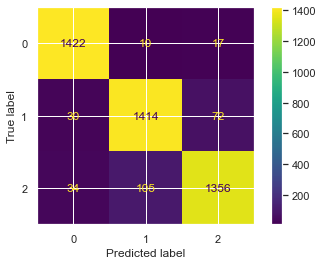

In [94]:
plot_confusion_matrix(des_tree_classifier, X_test, y_test)

In [95]:
print(classification_report(des_tree_classifier_prediction, y_test))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1486
           1       0.93      0.92      0.93      1529
           2       0.91      0.94      0.92      1445

    accuracy                           0.94      4460
   macro avg       0.94      0.94      0.94      4460
weighted avg       0.94      0.94      0.94      4460



    From all the above models we can see that Random Forest model is giving better predictions with highest percentage of accuracy of 95% and is faster than other model to execute.

# 7. Model Performance

In [96]:
cr = classification_report(y_test, random_forest_classifier_prediction)

Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.96      0.99      0.97      1449
           1       0.89      0.97      0.93      1516
           2       0.98      0.86      0.92      1495

    accuracy                           0.94      4460
   macro avg       0.94      0.94      0.94      4460
weighted avg       0.94      0.94      0.94      4460



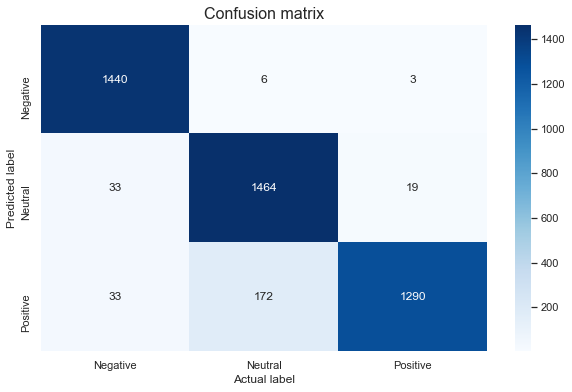

In [97]:
print("Classification Report:\n----------------------\n", cr)
cm = confusion_matrix(y_test,random_forest_classifier_prediction)

# plot confusion matrix 
plt.figure(figsize=(10,6))
sentiment_classes = ['Negative', 'Neutral', 'Positive']
sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d', 
            xticklabels=sentiment_classes,
            yticklabels=sentiment_classes)
plt.title('Confusion matrix', fontsize=16)
plt.xlabel('Actual label', fontsize=12)
plt.ylabel('Predicted label', fontsize=12)
plt.show()

# 8. Predictions and Submissions

In [98]:
pipe = Pipeline([('tfid',TfidfVectorizer()),('RF',RandomForestClassifier())])

In [99]:
pipe.fit(X,y)

Pipeline(steps=[('tfid', TfidfVectorizer()), ('RF', RandomForestClassifier())])

In [100]:
pipe.predict(['ok flight'])

array([2], dtype=int64)

    In the begining of data preprocessing we already converted the sentiments to 0,1,2:
    * Negative = 0
    * Neutral = 1
    * Positive = 2
    So, our model has predicted correctly as Positive because 'ok flight' is the Positive sentiment.

In [101]:
pipe.predict(X)

array([1, 1, 0, ..., 1, 1, 2], dtype=int64)

In [102]:
predicted_values = pd.DataFrame({'Sentiment Predictions': pipe.predict(X)})

In [103]:
predicted_values

Sentiment Predictions
0                          1
1                          1
2                          0
3                          2
4                          0
...                      ...
14635                      1
14636                      0
14637                      1
14638                      1
14639                      2

[14640 rows x 1 columns]

In [104]:
main_df = pd.read_csv('E:/PIP_Devmallya/Week_3/Problem_2/tweets_2.csv')
main_df.head()

tweet_id airline_sentiment  airline_sentiment_confidence  \
0  5.703060e+17           Neutral                       0.00000   
1  5.703010e+17           Neutral                       0.00000   
2  5.703010e+17          Negative                      -0.31250   
3  5.703010e+17          Positive                       0.00625   
4  5.703010e+17          Negative                      -0.35000   

            negativereason  negativereason_confidence         airline  \
0                      NaN                     0.0000  Virgin America   
1                      NaN                     0.0000  Virgin America   
2  Flight Booking Problems                     0.0000  Virgin America   
3                      NaN                    -0.3306  Virgin America   
4  Flight Booking Problems                    -0.5829  Virgin America   

         name  retweet_count  \
0     cairdin              0   
1    jnardino              0   
2  yvonnalynn              0   
3    jnardino              0   
4    jnardino              0   

                                                text tweet_coord  \
0                @VirginAmerica What @dhepburn said.         NaN   
1  @VirginAmerica plus you've added commercials t...         NaN   
2  @VirginAmerica I didn't today... Must mean I n...         NaN   
3  @VirginAmerica it's really aggressive to blast...         NaN   
4  @VirginAmerica and it's a really big bad thing...         NaN   

               tweet_created tweet_location               user_timezone  
0  2015-02-24 11:35:52 -0800            NaN  Eastern Time (US & Canada)  
1  2015-02-24 11:15:59 -0800            NaN  Pacific Time (US & Canada)  
2  2015-02-24 11:15:48 -0800      Lets Play  Central Time (US & Canada)  
3  2015-02-24 11:15:36 -0800            NaN  Pacific Time (US & Canada)  
4  2015-02-24 11:14:45 -0800            NaN  Pacific Time (US & Canada)

In [105]:
main_df = pd.concat([main_df, pd.concat([predicted_values], axis=0)], axis=1)

In [106]:
main_df.head()

tweet_id airline_sentiment  airline_sentiment_confidence  \
0  5.703060e+17           Neutral                       0.00000   
1  5.703010e+17           Neutral                       0.00000   
2  5.703010e+17          Negative                      -0.31250   
3  5.703010e+17          Positive                       0.00625   
4  5.703010e+17          Negative                      -0.35000   

            negativereason  negativereason_confidence         airline  \
0                      NaN                     0.0000  Virgin America   
1                      NaN                     0.0000  Virgin America   
2  Flight Booking Problems                     0.0000  Virgin America   
3                      NaN                    -0.3306  Virgin America   
4  Flight Booking Problems                    -0.5829  Virgin America   

         name  retweet_count  \
0     cairdin              0   
1    jnardino              0   
2  yvonnalynn              0   
3    jnardino              0   
4    jnardino              0   

                                                text tweet_coord  \
0                @VirginAmerica What @dhepburn said.         NaN   
1  @VirginAmerica plus you've added commercials t...         NaN   
2  @VirginAmerica I didn't today... Must mean I n...         NaN   
3  @VirginAmerica it's really aggressive to blast...         NaN   
4  @VirginAmerica and it's a really big bad thing...         NaN   

               tweet_created tweet_location               user_timezone  \
0  2015-02-24 11:35:52 -0800            NaN  Eastern Time (US & Canada)   
1  2015-02-24 11:15:59 -0800            NaN  Pacific Time (US & Canada)   
2  2015-02-24 11:15:48 -0800      Lets Play  Central Time (US & Canada)   
3  2015-02-24 11:15:36 -0800            NaN  Pacific Time (US & Canada)   
4  2015-02-24 11:14:45 -0800            NaN  Pacific Time (US & Canada)   

   Sentiment Predictions  
0                      1  
1                      1  
2                      0  
3                      2  
4                      0

In [107]:
main_df.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline', 'name',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone', 'Sentiment Predictions'],
      dtype='object')

In [108]:
final_df = main_df.drop(['tweet_id', 'airline', 'name', 'retweet_count', 'tweet_coord', 'tweet_created', 'tweet_location', 'user_timezone'], axis = 1)
final_df.head()

airline_sentiment  airline_sentiment_confidence           negativereason  \
0           Neutral                       0.00000                      NaN   
1           Neutral                       0.00000                      NaN   
2          Negative                      -0.31250  Flight Booking Problems   
3          Positive                       0.00625                      NaN   
4          Negative                      -0.35000  Flight Booking Problems   

   negativereason_confidence  \
0                     0.0000   
1                     0.0000   
2                     0.0000   
3                    -0.3306   
4                    -0.5829   

                                                text  Sentiment Predictions  
0                @VirginAmerica What @dhepburn said.                      1  
1  @VirginAmerica plus you've added commercials t...                      1  
2  @VirginAmerica I didn't today... Must mean I n...                      0  
3  @VirginAmerica it's really aggressive to blast...                      2  
4  @VirginAmerica and it's a really big bad thing...                      0

In [109]:
final_df.to_csv('E:/PIP_Devmallya/Week_3/Problem_2/submissions.csv', index = False)